## Predator-Prey Population Differential Equations


In this notebook we will a simple population equation [1]

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt

## Predators and prey
The cyclical relationship of Predators and Prey in the wild  means that when there is an abundance of prey, the predators will eat more and their population will increase. On the other hand, if there is a shortage in the number of prey, the number of predators will decrease. One of the of the most famous examples of this was observed by the fur traders  Hudson's Bay Company of Canada. The company collected data about the number of lynx and hare pelts they purchased over a 90 year period. Their data showed the cylical nature of the predator prey relationship (Figure below).
<img src="lynx-hare.jpg" alt="Hare Lynx Interaction" style="width: 400px;"/>
<em><center> Figure 1: The Lynx-Hare Cycle  [1]. </center></em>
This kind of behaviour has been observed in many pairs of predators and prey from mammals to fish to beyond. 

## Snow Hares and Lynxes
In a balanced eco system the relationship between snow hares (prey) and lynxes (predator) can be described mathematically using a Loketta-Volterra model [2-4]
\begin{equation}
\begin{array}{cl}
\frac{d H}{dt}=a_{Birth} H-b_{Con}LH,\\
\frac{d L}{dt}=-c_{Death}L+d_{Food} L H,\\
\end{array}
\end{equation}
this set of equations models the interaction between snow hares (H) and lynxes (L). The lynes are the predators who eat the snow hares to survive. Where there parameters 
* $a_{Birth}$ is the birth rate of the snow hares;
* $b_{Con}$ is the consumation rate of snow hares by lynxes (interaction);
* $c_{Death}$ is the death rate of lynxes if there is no food source;
* $d_{Food}$ is the rate that lynxes eat the snow hares to survive (interaction).


In [82]:
a_Birth=4.0
b_Con=0.1
c_Death=0.9
d_Food=0.001


## Discrete Domain 
To numiercally approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...10$.
The figure below illustrate the discrete domain.

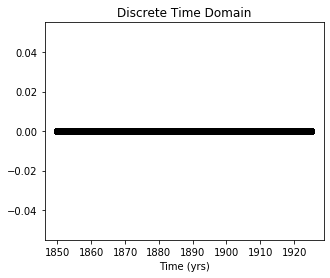

In [83]:
h=0.001
t=np.arange(1850,1925+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [89]:
N=len(t) # Number of Steps
H=np.zeros(N) # Numerical Solution Hares
H[0]=900
L=np.zeros(N) # Numerical Solution Lynxes
L[0]=40



We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
\text{ INSERT DIFFERENCE EQUATION HERE,}
\end{equation}
where $h$ is the stepsize and where $P_i$ is the numerical approximation of $p(t_i)$ at distance $t_i$, for $i=0,...,N$


In [90]:
a_Birth=0.4
b_Con=0.01
c_Death=0.09
d_Food=0.001



for i in range (0,N-1):
    H[i+1]=H[i]+h*(a_Birth-b_Con*L[i])*H[i]# INSERT EQUATION HERE 
    L[i+1]=L[i]+h*(-c_Death+d_Food*H[i])*L[i]# INSERT EQUATION HERE 



## Results
Figure 2 shows a simulation of the populations of salmon and small fish from 2000 to 2100, assuming that nothing is added to enviroment.  The salmon population fluxuates between 45 and 55 billion while the small fish population fluctuates from 25 to 85 billion. The equation illustates a relative equilibrium between the two populations ensuring neither get too big or too small.

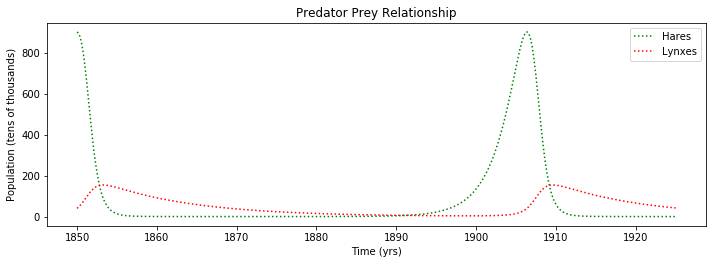

In [91]:
## Plotting Figure
fig = plt.figure(1,figsize=(10,4))

ax = fig.add_subplot(1,1,1)

ax.plot(t,H,':',color='green',label='Hares')
ax.plot(t,L,':',color='red',label='Lynxes')

ax.legend()
ax.set_xlabel('Time (yrs)')
ax.set_ylabel('Population (tens of thousands)')
#ax.legend(loc='best')
ax.set_title('Predator Prey Relationship')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## Phase Plane Plot

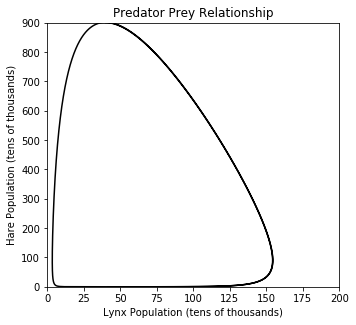

In [92]:
## Plotting Figure
fig = plt.figure(1,figsize=(5,5))

ax = fig.add_subplot(1,1,1)

ax.plot(L,H,'-',color='black')

ax.set_xlabel('Lynx Population (tens of thousands)')
ax.set_ylabel('Hare Population (tens of thousands)')
#ax.legend(loc='best')
ax.set_title('Predator Prey Relationship')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.xlim(0,200)
plt.ylim(0,900)

plt.show()

## Equilibrium
The Loketta-Volterra model [4] can be written in matrix frorm
\begin{equation}
\begin{pmatrix}
\frac{dH}{dt}\\
\frac{dL}{dt}
\end{pmatrix}
=\begin{pmatrix}
a_{Birth} & -b_{Con}L \\
-c_{Death} & d_{Food}H
\end{pmatrix}
\begin{pmatrix}
H \\
L 
\end{pmatrix}.
\end{equation}
The point of equilibrium (stability) is when $\frac{dH}{dt}=0$ and $\frac{dL}{dt}=0$,
\begin{equation}
\begin{pmatrix}
0\\
0
\end{pmatrix}
=\begin{pmatrix}
a_{Birth} & -b_{Con}L \\
-c_{Death} & d_{Food}H
\end{pmatrix}
\begin{pmatrix}
H \\
L 
\end{pmatrix},
\end{equation}
this gives two solutions for $H$ and $L$: 
1. the trivial solution is $H=0$ and $L=0$;
2. the non-trivial solution is $H=\frac{c_{Death}}{d_{Food}}$ and $L=\frac{a_{Birth}}{b_{Con}}$.


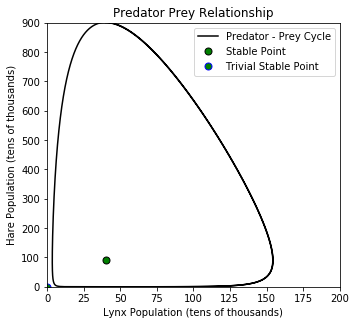

In [93]:
## Plotting Figure
fig = plt.figure(1,figsize=(5,5))

ax = fig.add_subplot(1,1,1)

ax.plot(L,H,'-',color='black',label='Predator - Prey Cycle')

ax.plot(a_Birth/b_Con,c_Death/d_Food,'o',markersize=7,color='g',markeredgecolor='k',label='Stable Point')
ax.plot(0,0,'o',markersize=7,color='g',markeredgecolor='b',label='Trivial Stable Point')



ax.set_xlabel('Lynx Population (tens of thousands)')
ax.set_ylabel('Hare Population (tens of thousands)')
#ax.legend(loc='best')
ax.set_title('Predator Prey Relationship')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.xlim(0,200)
plt.ylim(0,900)
plt.legend()
plt.show()

## Nullclines
The Nullclines are defined as curves when $\frac{dH}{dt}=0$ or $\frac{dH}{dt}=0$.
Here we have two simple nullcline;
1. For $\frac{dH}{dt}=0$, gives the vertical nullcline 
$$L=\frac{a_{Birth}}{b_{Con}};$$
2. For $\frac{dL}{dt}=0$, gives the horizontal nullcline 
$$H=\frac{a_{Birth}}{b_{Con}}.$$
The nullclines divides the graph into quadrantes:
1. The first quadrant (Q1) is when $\frac{dH}{dt}<0$ and $\frac{dL}{dt}>0$, the Hare population is decreasing while the Lynx population is increasing;
2. The second quadrant (Q2) is when $\frac{dH}{dt}>0$ and $\frac{dL}{dt}>0$, the Hare population and the Lynx population are increasing;

3. The third quadrant (Q3) is when $\frac{dH}{dt}>0$ and $\frac{dL}{dt}<0$, the Hare population is increasing while the Lynx population is decreasing;

4. The fourth quadrant (Q1) is when $\frac{dH}{dt}<0$ and $\frac{dL}{dt}<0$, the Hare and Lynx populations are decreasing.

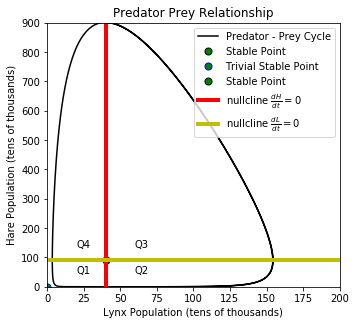

In [94]:
## Plotting Figure
fig = plt.figure(1,figsize=(5,5))

ax = fig.add_subplot(1,1,1)

ax.plot(L,H,'-',color='black',label='Predator - Prey Cycle')

ax.plot(a_Birth/b_Con,c_Death/d_Food,'o',markersize=7,color='g',markeredgecolor='k',label='Stable Point')
ax.plot(0,0,'o',markersize=7,color='g',markeredgecolor='b',label='Trivial Stable Point')

ax.plot(a_Birth/b_Con,c_Death/d_Food,'o',markersize=7,color='g',markeredgecolor='k',label='Stable Point')

ax.axvline(a_Birth/b_Con,linewidth=4, color='r',label=r'nullcline $\frac{dH}{dt}=0$')

ax.axhline(c_Death/d_Food,linewidth=4, color='y',label=r'nullcline $\frac{dL}{dt}=0$')


ax.set_xlabel('Lynx Population (tens of thousands)')
ax.set_ylabel('Hare Population (tens of thousands)')
#ax.legend(loc='best')
ax.set_title('Predator Prey Relationship')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.text(a_Birth/b_Con*0.5,c_Death/d_Food*0.5,r'Q1')
plt.text(a_Birth/b_Con*1.5,c_Death/d_Food*0.5,r'Q2')
plt.text(a_Birth/b_Con*1.5,c_Death/d_Food*1.5,r'Q3')


plt.text(a_Birth/b_Con*0.5,c_Death/d_Food*1.5,r'Q4')
plt.xlim(0,200)
plt.ylim(0,900)
plt.legend()
plt.show()

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html

[2]  Vito Volterra.  Fluctuations in the abundance of a species considered mathematically. Nature,118:558–560,1926.

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.

[4] Steven H. Strogatz, Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering (studies in nonlinearity). 2001